In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflow_federated as tff

C:\Users\Hp\anaconda3\envs\Project2\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.2 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [3]:
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
import torch
import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf


In [3]:
#img = image.load_img("Dataset1/training/covid/COVID-100.png")

In [4]:
#plt.imshow(img)

In [5]:
#cv2.imread("Dataset1/training/covid/COVID-1.png")

In [6]:
#cv2.imread("Dataset1/training/covid/COVID-1.png").shape

In [7]:
train = ImageDataGenerator(rescale=1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

In [8]:
train_dataset = train.flow_from_directory('Dataset1/training/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset = train.flow_from_directory('Dataset1/testing/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset = train.flow_from_directory('Dataset1/validation/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 400 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
Found 80 images belonging to 4 classes.


In [9]:
validation_dataset.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2, 'tuberculosis': 3}

In [10]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [11]:
model1 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding='same', input_shape = (256,256,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(4,activation = 'softmax')
                                   ])

In [12]:
model1.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [13]:
model_fit = model1.fit(train_dataset,
                     steps_per_epoch = 20,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
20/20 [==============================] - 41s 2s/step - loss: 2.7445 - accuracy: 0.2000 - val_loss: 1.3855 - val_accuracy: 0.2875
Epoch 2/30
20/20 [==============================] - 37s 2s/step - loss: 1.3938 - accuracy: 0.1525 - val_loss: 1.3812 - val_accuracy: 0.2500
Epoch 3/30
20/20 [==============================] - 37s 2s/step - loss: 1.6697 - accuracy: 0.1150 - val_loss: 1.3837 - val_accuracy: 0.4125
Epoch 4/30
20/20 [==============================] - 38s 2s/step - loss: 1.4136 - accuracy: 0.2625 - val_loss: 1.3658 - val_accuracy: 0.2500
Epoch 5/30
20/20 [==============================] - 37s 2s/step - loss: 1.4430 - accuracy: 0.4000 - val_loss: 1.3370 - val_accuracy: 0.2500
Epoch 6/30
20/20 [==============================] - 38s 2s/step - loss: 1.5266 - accuracy: 0.4925 - val_loss: 1.3625 - val_accuracy: 0.2625
Epoch 7/30
20/20 [==============================] - 38s 2s/step - loss: 1.1283 - accuracy: 0.4700 - val_loss: 0.9822 - val_accuracy: 0.6000
Epoch 8/30
20/20 [==

In [14]:
model1.evaluate(validation_dataset)

4/4 [==============================] - 2s 581ms/step - loss: 0.9289 - accuracy: 0.8125


[0.9288860559463501, 0.8125]

In [15]:
predictions = model1.predict(x=validation_dataset, verbose=0)

In [16]:
for i in predictions:
    print(i)

[0.49002585 0.00120743 0.00151032 0.5072565 ]
[9.8398995e-01 3.8685073e-07 1.6009644e-02 7.3862352e-09]
[0.95184404 0.00240232 0.00154282 0.04421085]
[1.22275084e-01 1.32943505e-05 1.23546299e-04 8.77588034e-01]
[9.0561807e-03 2.6635241e-06 9.9094111e-01 1.7719627e-08]
[9.6591938e-01 2.8864538e-02 1.1107949e-05 5.2050720e-03]
[9.8892081e-01 1.1018435e-02 8.8403715e-07 5.9908929e-05]
[5.6792057e-01 2.3410363e-04 4.3183401e-01 1.1286948e-05]
[9.8103744e-01 1.8520754e-02 8.8347433e-06 4.3292664e-04]
[9.8679835e-01 1.3171447e-02 2.3783944e-07 2.9946541e-05]
[5.8700543e-02 1.2670079e-03 9.4003201e-01 3.9547933e-07]
[9.9942040e-01 3.3434160e-04 1.3066424e-06 2.4399703e-04]
[9.8616809e-01 1.3819187e-02 1.0428588e-05 2.2594133e-06]
[8.9842707e-01 1.0136314e-01 7.3695672e-05 1.3610149e-04]
[0.68970835 0.00464082 0.2065036  0.09914725]
[9.9721402e-01 2.7859944e-03 3.2172516e-09 6.0628487e-08]
[9.9573565e-01 5.7422207e-04 3.6816825e-03 8.4317271e-06]
[9.9878365e-01 6.9537369e-04 2.6856206e-04 2.5

In [17]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [18]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [19]:
cm = confusion_matrix(y_true=validation_dataset.classes, y_pred=rounded_predictions)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[16  0  2  2]
 [ 6 14  0  0]
 [ 0  0 20  0]
 [ 5  1  0 14]]


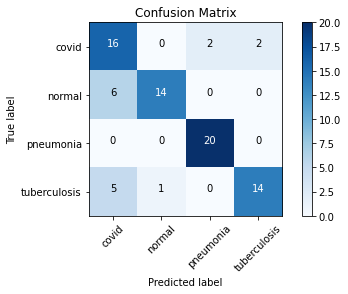

In [21]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [22]:
weight1 = model1.get_weights()

In [23]:
model_json = model1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("modelfl11.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
#model1.set_weights(weight)

In [25]:
#weight = model1.get_weights()

In [26]:
train_dataset2 = train.flow_from_directory('Dataset2/training/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset2 = train.flow_from_directory('Dataset2/testing/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset2 = train.flow_from_directory('Dataset2/validation/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 400 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
Found 80 images belonging to 4 classes.


In [27]:
model2 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding='same', input_shape = (256,256,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(4,activation = 'softmax')
                                   ])

In [28]:
model2.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [29]:
model_fit = model2.fit(train_dataset,
                     steps_per_epoch = 20,
                     epochs = 30,
                     validation_data = validation_dataset2)

Epoch 1/30
20/20 [==============================] - 37s 2s/step - loss: 2.9875 - accuracy: 0.2000 - val_loss: 1.3864 - val_accuracy: 0.3500
Epoch 2/30
20/20 [==============================] - 36s 2s/step - loss: 1.4129 - accuracy: 0.2300 - val_loss: 1.3838 - val_accuracy: 0.2500
Epoch 3/30
20/20 [==============================] - 32s 2s/step - loss: 1.3704 - accuracy: 0.3300 - val_loss: 2.2401 - val_accuracy: 0.2500
Epoch 4/30
20/20 [==============================] - 33s 2s/step - loss: 1.2993 - accuracy: 0.4175 - val_loss: 1.1705 - val_accuracy: 0.4875
Epoch 5/30
20/20 [==============================] - 33s 2s/step - loss: 1.1263 - accuracy: 0.5100 - val_loss: 1.1337 - val_accuracy: 0.4375
Epoch 6/30
20/20 [==============================] - 36s 2s/step - loss: 1.0767 - accuracy: 0.5150 - val_loss: 1.0603 - val_accuracy: 0.5500
Epoch 7/30
20/20 [==============================] - 33s 2s/step - loss: 0.9835 - accuracy: 0.5300 - val_loss: 0.9883 - val_accuracy: 0.5250
Epoch 8/30
20/20 [==

In [30]:
model2.evaluate(validation_dataset2)

4/4 [==============================] - 2s 624ms/step - loss: 1.4791 - accuracy: 0.7000


[1.4790576696395874, 0.699999988079071]

In [31]:
predictions = model2.predict(x=validation_dataset2, verbose=0)

In [32]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [33]:
cm = confusion_matrix(y_true=validation_dataset2.classes, y_pred=rounded_predictions)

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 6 10  1  3]
 [ 4 15  0  1]
 [ 0  1 18  1]
 [ 1  1  1 17]]


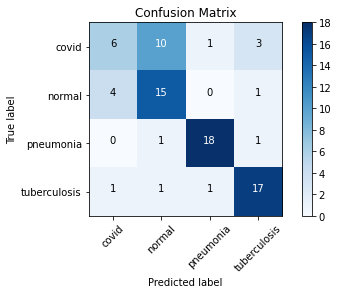

In [35]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [36]:
weight2 = model2.get_weights()

In [37]:
model_json = model2.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("modelfl21.h5")
print("Saved model to disk")

Saved model to disk


In [38]:
#model1.set_weights(weight)

In [39]:
#weight = model1.get_weights()

In [40]:
train_dataset3 = train.flow_from_directory('Dataset3/training/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset3 = train.flow_from_directory('Dataset3/testing/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset3 = train.flow_from_directory('Dataset3/validation/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 400 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
Found 80 images belonging to 4 classes.


In [41]:
model3 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding='same', input_shape = (256,256,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(4,activation = 'softmax')
                                   ])

In [42]:
#model3.set_weights(weight)

In [43]:
model3.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [44]:
model_fit = model3.fit(train_dataset3,
                     steps_per_epoch = 20,
                     epochs = 30,
                     validation_data = validation_dataset3)

Epoch 1/30
20/20 [==============================] - 34s 2s/step - loss: 2.0614 - accuracy: 0.1500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/30
20/20 [==============================] - 33s 2s/step - loss: 1.3922 - accuracy: 0.0500 - val_loss: 1.3862 - val_accuracy: 0.2750
Epoch 3/30
20/20 [==============================] - 33s 2s/step - loss: 1.3887 - accuracy: 0.1875 - val_loss: 1.3839 - val_accuracy: 0.4500
Epoch 4/30
20/20 [==============================] - 32s 2s/step - loss: 1.4182 - accuracy: 0.1800 - val_loss: 1.3836 - val_accuracy: 0.2750
Epoch 5/30
20/20 [==============================] - 32s 2s/step - loss: 1.7741 - accuracy: 0.1650 - val_loss: 1.4204 - val_accuracy: 0.3000
Epoch 6/30
20/20 [==============================] - 32s 2s/step - loss: 1.4172 - accuracy: 0.3425 - val_loss: 1.3048 - val_accuracy: 0.5375
Epoch 7/30
20/20 [==============================] - 32s 2s/step - loss: 1.4513 - accuracy: 0.3650 - val_loss: 1.1549 - val_accuracy: 0.5500
Epoch 8/30
20/20 [==

In [45]:
model3.evaluate(validation_dataset3)

4/4 [==============================] - 3s 758ms/step - loss: 1.1730 - accuracy: 0.7500


[1.1729800701141357, 0.75]

In [46]:
predictions = model3.predict(x=validation_dataset3, verbose=0)

In [47]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [48]:
cm = confusion_matrix(y_true=validation_dataset3.classes, y_pred=rounded_predictions)

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 8  9  0  3]
 [ 4 14  1  1]
 [ 0  1 18  1]
 [ 1  0  0 19]]


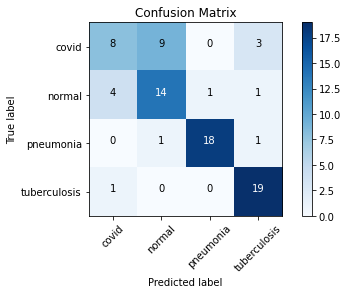

In [50]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [51]:
weight3 = model3.get_weights()

In [52]:
model_json = model3.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model3.save_weights("modelfl31.h5")
print("Saved model to disk")

Saved model to disk


In [53]:
#model1.set_weights(weight3)

In [54]:
#weight = model1.get_weights()

In [55]:
train_dataset4 = train.flow_from_directory('Dataset4/training/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset4 = train.flow_from_directory('Dataset4/testing/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset4 = train.flow_from_directory('Dataset4/validation/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 400 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
Found 80 images belonging to 4 classes.


In [56]:
model4 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding='same', input_shape = (256,256,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(4,activation = 'softmax')
                                   ])

In [57]:
#model4.set_weights(weight)

In [58]:
model4.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [59]:
model_fit = model4.fit(train_dataset4,
                     steps_per_epoch = 20,
                     epochs = 30,
                     validation_data = validation_dataset4)

Epoch 1/30
20/20 [==============================] - 49s 2s/step - loss: 1.5118 - accuracy: 0.1500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/30
20/20 [==============================] - 45s 2s/step - loss: 1.4086 - accuracy: 0.1500 - val_loss: 1.3861 - val_accuracy: 0.2500
Epoch 3/30
20/20 [==============================] - 45s 2s/step - loss: 1.3925 - accuracy: 0.0550 - val_loss: 1.3857 - val_accuracy: 0.2250
Epoch 4/30
20/20 [==============================] - 45s 2s/step - loss: 1.4206 - accuracy: 0.1200 - val_loss: 1.3788 - val_accuracy: 0.4375
Epoch 5/30
20/20 [==============================] - 45s 2s/step - loss: 1.4468 - accuracy: 0.1450 - val_loss: 1.3489 - val_accuracy: 0.4125
Epoch 6/30
20/20 [==============================] - 45s 2s/step - loss: 1.2973 - accuracy: 0.3375 - val_loss: 1.1495 - val_accuracy: 0.5375
Epoch 7/30
20/20 [==============================] - 45s 2s/step - loss: 1.2512 - accuracy: 0.5175 - val_loss: 1.0820 - val_accuracy: 0.4875
Epoch 8/30
20/20 [==

In [60]:
model4.evaluate(validation_dataset4)

4/4 [==============================] - 4s 1s/step - loss: 1.1364 - accuracy: 0.8000


[1.1363996267318726, 0.800000011920929]

In [61]:
predictions = model4.predict(x=validation_dataset4, verbose=0)

In [62]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [63]:
cm = confusion_matrix(y_true=validation_dataset4.classes, y_pred=rounded_predictions)

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  9  1  0]
 [ 1 19  0  0]
 [ 1  0 19  0]
 [ 0  4  0 16]]


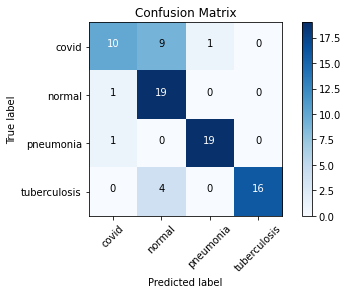

In [65]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [67]:
labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
report = classification_report(validation_dataset.classes, rounded_predictions, target_names=labels)
print(report)

              precision    recall  f1-score   support

       covid       0.83      0.50      0.62        20
      normal       0.59      0.95      0.73        20
   pneumonia       0.95      0.95      0.95        20
tuberculosis       1.00      0.80      0.89        20

    accuracy                           0.80        80
   macro avg       0.84      0.80      0.80        80
weighted avg       0.84      0.80      0.80        80



In [68]:
weight4 = model4.get_weights()

In [69]:
model_json = model4.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model4.save_weights("modelfl41.h5")
print("Saved model to disk")

Saved model to disk


In [70]:
#model.set_weights(weight4)

In [71]:
#weight = model.get_weights()

In [72]:
train_dataset5 = train.flow_from_directory('Dataset5/training/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset5 = train.flow_from_directory('Dataset5/testing/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset5 = train.flow_from_directory('Dataset5/validation/',
                                         target_size = (256,256),
                                         batch_size = 20,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 400 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
Found 80 images belonging to 4 classes.


In [73]:
model5 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding='same', input_shape = (256,256,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(4,activation = 'softmax')
                                   ])

In [74]:
#model5.set_weights(weight)

In [75]:
model5.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [76]:
model_fit = model5.fit(train_dataset5,
                     steps_per_epoch = 20,
                     epochs = 30,
                     validation_data = validation_dataset5)

Epoch 1/30
20/20 [==============================] - 49s 2s/step - loss: 2.8061 - accuracy: 0.2825 - val_loss: 1.3848 - val_accuracy: 0.2500
Epoch 2/30
20/20 [==============================] - 46s 2s/step - loss: 1.4466 - accuracy: 0.2100 - val_loss: 1.4438 - val_accuracy: 0.2500
Epoch 3/30
20/20 [==============================] - 46s 2s/step - loss: 2.1368 - accuracy: 0.1975 - val_loss: 1.3842 - val_accuracy: 0.2500
Epoch 4/30
20/20 [==============================] - 46s 2s/step - loss: 1.4324 - accuracy: 0.2750 - val_loss: 1.3775 - val_accuracy: 0.2750
Epoch 5/30
20/20 [==============================] - 46s 2s/step - loss: 1.4353 - accuracy: 0.2425 - val_loss: 1.3365 - val_accuracy: 0.4625
Epoch 6/30
20/20 [==============================] - 45s 2s/step - loss: 1.3540 - accuracy: 0.4425 - val_loss: 1.0541 - val_accuracy: 0.4375
Epoch 7/30
20/20 [==============================] - 42s 2s/step - loss: 1.2544 - accuracy: 0.3525 - val_loss: 1.1196 - val_accuracy: 0.4500
Epoch 8/30
20/20 [==

In [77]:
#model1.set_weights(weight5)

In [78]:
model5.evaluate(validation_dataset5)

4/4 [==============================] - 2s 450ms/step - loss: 0.7466 - accuracy: 0.7750


[0.7466173768043518, 0.7749999761581421]

In [79]:
predictions = model5.predict(x=validation_dataset5, verbose=0)

In [80]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [81]:
cm = confusion_matrix(y_true=validation_dataset5.classes, y_pred=rounded_predictions)

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17  1  0  2]
 [ 5 10  0  5]
 [ 1  0 17  2]
 [ 0  1  0 19]]


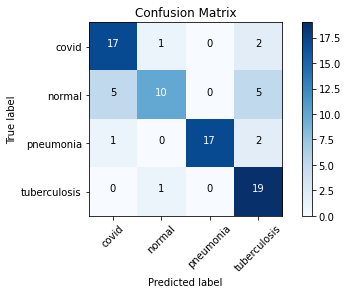

In [83]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [85]:
labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
report = classification_report(validation_dataset.classes, rounded_predictions, target_names=labels)
print(report)

              precision    recall  f1-score   support

       covid       0.74      0.85      0.79        20
      normal       0.83      0.50      0.62        20
   pneumonia       1.00      0.85      0.92        20
tuberculosis       0.68      0.95      0.79        20

    accuracy                           0.79        80
   macro avg       0.81      0.79      0.78        80
weighted avg       0.81      0.79      0.78        80



In [86]:
weight5 = model5.get_weights()

In [87]:
model_json = model5.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model5.save_weights("modelfl51.h5")
print("Saved model to disk")

Saved model to disk


In [88]:
temp1 = np.add(weight1,weight2)
temp2 = np.add(temp1,weight3)
temp3 = np.add(temp2,weight4)
weight = np.add(temp3,weight5) 

C:\Users\Hp\anaconda3\envs\Project2\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
C:\Users\Hp\anaconda3\envs\Project2\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
C:\Users\Hp\anaconda3\envs\Project2\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

In [89]:
#weight

In [90]:
#weight1

In [91]:
weight = weight/5

In [92]:
#weight

In [93]:
model_final = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding='same', input_shape = (256,256,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(4,activation = 'softmax')
                                   ])

In [94]:
model_final.set_weights(weight)

In [95]:
model_final.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [96]:
score = model_final.evaluate(validation_dataset5)
print("%s: %.2f%%" % (model_final.metrics_names[1], score[1]*100))

4/4 [==============================] - 2s 473ms/step - loss: 1.3867 - accuracy: 0.2500
accuracy: 25.00%


In [97]:
predictions = model_final.predict(x=validation_dataset5, verbose=0)

In [98]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [99]:
cm = confusion_matrix(y_true=validation_dataset5.classes, y_pred=rounded_predictions)

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  0  0  0]
 [20  0  0  0]
 [20  0  0  0]
 [20  0  0  0]]


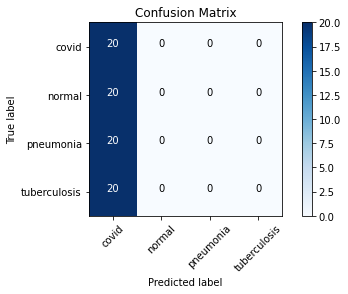

In [101]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [1]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model1 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model1.load_weights("modelfl11.h5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model2.load_weights("modelfl21.h5")
print("Loaded model from disk")

Loaded model from disk


In [5]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model3 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model3.load_weights("modelfl31.h5")
print("Loaded model from disk")

Loaded model from disk


In [6]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model4 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model4.load_weights("modelfl41.h5")
print("Loaded model from disk")

Loaded model from disk


In [7]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model5 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model5.load_weights("modelfl51.h5")
print("Loaded model from disk")

Loaded model from disk


In [8]:
all_models2 = list()

In [9]:
all_models2.append(loaded_model1)
all_models2.append(loaded_model2)
all_models2.append(loaded_model3)
all_models2.append(loaded_model4)
all_models2.append(loaded_model5)

In [13]:
from array import array
# create a model from the weights of multiple models
def model_weight_ensemble(members, weights):
    # determine how many layers need to be averaged
    n_layers = len(members[0].get_weights())
    # create an set of average model weights
    avg_model_weights = list()
    for layer in range(n_layers):
        # collect this layer from each model
        layer_weights = array([model.get_weights()[layer] for model in members])
        # weighted average of weights for this layer
        avg_layer_weights = average(layer_weights, axis=0, weights=weights)
        # store average layer weights
        avg_model_weights.append(avg_layer_weights)
    # create a new model with the same structure
    model = clone_model(members[0])
    # set the weights in the new
    model.set_weights(avg_model_weights)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
# load all models into memory
members = all_models2
print('Loaded %d models' % len(members))
# prepare an array of equal weights
n_models = len(members)
weights = [1/n_models for i in range(1, n_models+1)]
# create a new model with the weighted average of all model weights
model = model_weight_ensemble(members, weights)
# summarize the created model
model.summary()

Loaded 5 models


TypeError: array() argument 1 must be a unicode character, not list

In [ ]:
score = model.evaluate(validation_dataset5)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [ ]:
predictions = model.predict(x=validation_dataset5, verbose=0)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(y_true=validation_dataset5.classes, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')